<a href="https://colab.research.google.com/github/gracious136/Data-Portfolio/blob/master/Flights_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

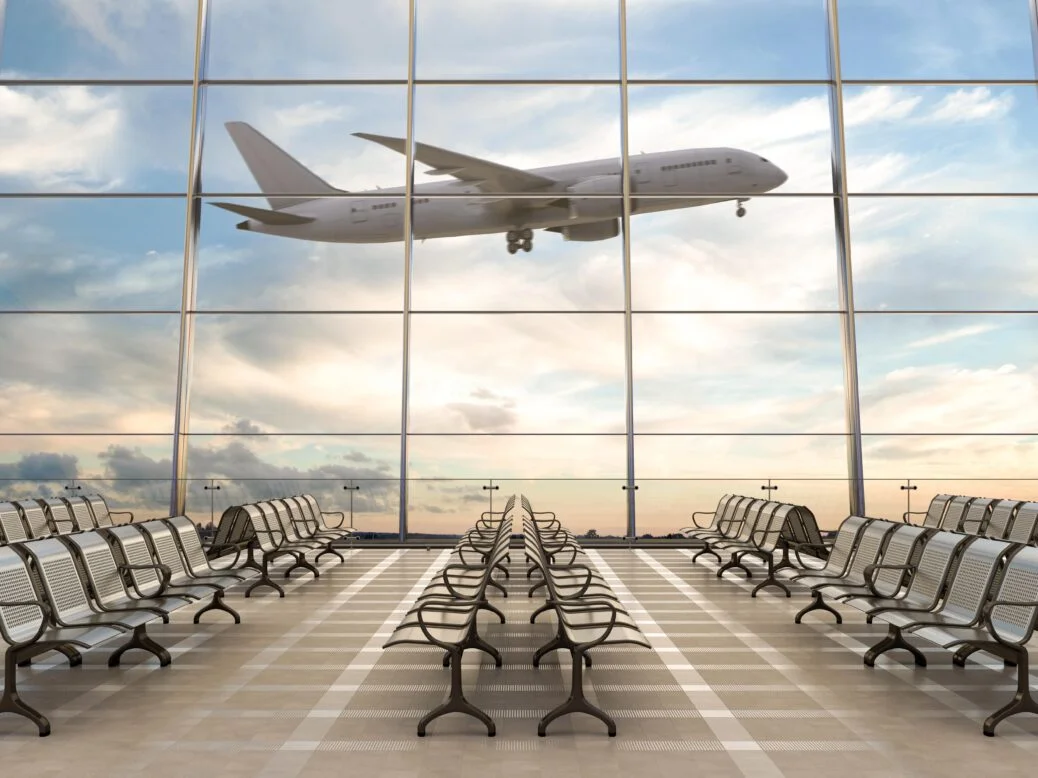
# Project Overview: Analysis of Flight Data for Traffic Analysis and Flight Planning

The goal of this project is to analyze flight data from five airports in the Los Angeles area to gain insights into traffic patterns from 2018. The project involves two main functions that leverage the flight data:



1.   Top 3 Early Flight Carriers (carriers_on_time()):

> This function determines the top three early flight carriers on a given day of the year and a desired destination. By analyzing historical flight data, it identifies the airlines that consistently operate early morning flights to the specified destination. This information can be valuable to see airlines that are puctual with regard to a desired destination.


2.   Minimum People Traffic Analysis (crowd_avoidance()):

> The second function focuses on identifying the best five days and corresponding time periods in a given month with minimal people traffic at an airport of destination. By analyzing historical flight data and passenger traffic patterns, it pinpoints the days and time periods when there is likely to be lower passenger volume at the specified airport. This information can be useful for airlines and passengers to plan travel during less crowded periods, ensuring a smoother and more comfortable experience.


Los Angeles Airports are:

* Los Angeles International Airport (LAX)
* Ontario International Airport (ONT)
* John Wayne Airport (SNA)
* Hollywood Burbank Airport (BUR)
* Long Beach Airport (LGB)

Dataset information:

* fl_datetime: flight date time
* tailnum: Plane tail number.
* carrier: Two letter carrier abbreviation.
* origin, dest: Origin and destination.
* dep_time, arr_time: Actual departure and arrival times (format HHMM or HMM), local tz.
* dep_delay, arr_delay: Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.
* air_time: Amount of time spent in the air, in minutes.





In [ ]:
import pandas as pd
import numpy as np

# load data
# This code is made to load our data stored on Google Drive
def gd_path(file_id):
    """Generate a shareable link from Google Drive file id."""
    return f"https://drive.google.com/uc?export=download&id={file_id}"

# Google Drive file ids
files_id = {
    "LAflights": "10kNZusetcMbSQetkC8rJLI4qtMFgbwmQ"
}

# Read data from Google Drive
LAflights = pd.read_csv(gd_path(files_id["LAflights"]), sep=",")

### Carriers on time: given a destination and a departure date, returns the three carriers with a lower departure delay in average.

In [ ]:
def carriers_on_time():

  while True:
    look_date = input('Enter the date you are interested in. use this format (YYYY-MM-DD):\n')

    if len(look_date) == 10 and look_date[4] == look_date[7] == '-':
      look_year = look_date[:4]
      look_month = look_date[5:7]
      look_day = look_date[8:]

      if look_year.isdigit() and look_month.isdigit() and look_day.isdigit():
        pass
      else:
        print('\u26A0 Invalid Date Format. Please run the code again Enter Date (YYYY-MM-DD) \u26A0')
        break

    else:
      print('\u26A0 Invalid Date Format. Please run the code again and Enter Date (YYYY-MM-DD) \u26A0')
      break


    airports = np.sort(LAflights.dest.unique())
    print(f'\nThis is a list of the destination airports\n{airports}')
    destination = input('\nEnter your destination in three letters: ').upper()

    if destination in airports and len(destination)==3:
      pass
    else:
      print('\u26A0 Invalid Destination airport \u26A0')
      break

    results = LAflights.assign(flight_date = pd.to_datetime(LAflights['fl_datetime']).dt.date)\
    .loc[lambda record : (record['flight_date']==pd.to_datetime(look_date)) & (record['dest']== destination)]\
    .groupby(['flight_date', 'dest','op_carrier'])\
    .agg({'dep_delay':'mean'}).round({'dep_delay':0}).sort_values(by='dep_delay', ascending=True)\
    .rename(columns={'dep_delay':'average_departure_delay'})\
    .head(3)


    return results


carriers_on_time()

Enter the date you are interested in. use this format (YYYY-MM-DD):
2018-01-01

This is a list of the destination airports
['ABQ' 'ACV' 'ANC' 'ASE' 'ATL' 'AUS' 'BDL' 'BIL' 'BLI' 'BNA' 'BOI' 'BOS'
 'BUF' 'BWI' 'BZN' 'CID' 'CLE' 'CLT' 'CMH' 'COS' 'CVG' 'DAL' 'DCA' 'DEN'
 'DFW' 'DRO' 'DSM' 'DTW' 'EGE' 'ELP' 'EUG' 'EWR' 'FAR' 'FAT' 'FCA' 'FLG'
 'FLL' 'FSD' 'GEG' 'GJT' 'HDN' 'HNL' 'HOU' 'IAD' 'IAH' 'ICT' 'IDA' 'IND'
 'ITO' 'JAC' 'JFK' 'KOA' 'LAS' 'LIH' 'LIT' 'MCI' 'MCO' 'MDW' 'MEM' 'MFE'
 'MFR' 'MIA' 'MKE' 'MMH' 'MRY' 'MSN' 'MSO' 'MSP' 'MSY' 'MTJ' 'OAK' 'OGD'
 'OGG' 'OKC' 'OMA' 'ORD' 'PDX' 'PHL' 'PHX' 'PIT' 'PRC' 'PSC' 'PSP' 'PVU'
 'RDM' 'RDU' 'RNO' 'SAN' 'SAT' 'SBA' 'SBP' 'SDF' 'SEA' 'SFO' 'SGF' 'SGU'
 'SJC' 'SLC' 'SMF' 'STL' 'STS' 'SUN' 'TPA' 'TUL' 'TUS' 'XNA']

Enter your destination in three letters: dfw


<ipython-input-61-a78f782134af>:33: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  .loc[lambda record : (record['flight_date']==pd.to_datetime(look_date)) & (record['dest']== destination)]\


average_departure_delay
flight_date dest op_carrier                         
2018-01-01  DFW  UA                             -9.0
                 OO                             -5.0
                 CP                              3.0

### Crowd avoidance: given a destination and a month, recommend which are the 5 best days and time range (morning, afternoon, evening and night) where there is a low number of flights departing from the airport, so there will be less people on there. The time ranges will be:

1. Morning: 5 am to 12 pm (noon)
2. Afternoon: 12 pm to 5 pm
3. Evening: 5 pm to 9 pm
4. Night: 9 pm to 4 am


In [ ]:
def crowd_avoidance():

  while True:
    valid_months =['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december']


    travel_month = input('Enter your desired month in full (e.g January, March etc):\n').title()

    if travel_month.lower() in valid_months:
      pass
    else:
      print('\u26A0 Wrong Month Format. Please run the code again Enter month (e.g January, March etc) \u26A0')
      break

    airports = np.sort(LAflights.dest.unique())
    destination = input('Enter your destination in three letters: ').upper()

    if destination in airports and len(destination)==3:
      pass
    else:
      print('\u26A0 Invalid Destination airport \u26A0')
      break

    results = LAflights\
                    .assign(period = ['Morning' if 5 <= time <=12 else 'Afternoon'
                    if 12 <= time <=17 else 'Evening' if 17 <= time <= 21 else 'Night'
                    for time in pd.to_datetime(LAflights['fl_datetime']).dt.hour ])\
                    .assign(flight_date = pd.to_datetime(LAflights['fl_datetime']).dt.date)\
                    .assign(flight_month = pd.to_datetime(LAflights['fl_datetime']).dt.strftime('%B'))\
                    .loc[lambda record : (record['flight_month']== travel_month) & ((record['dest']== destination) | (record['origin']== destination))]\
                    .groupby(['flight_month', 'flight_date','period']).agg({'origin' : 'count'})\
                    .groupby(['flight_date', 'period']).agg({'origin':'sum'})\
                    .sort_values(by='origin', ascending=True)\
                    .rename(columns={'origin' : 'total_flights'})\
                    .head(5)

    return results


crowd_avoidance()

Enter your desired month in full (e.g January, March etc):
may
Enter your destination in three letters: tul


,,total_flights
flight_date,period,
2018-05-03,Morning,1
2018-05-06,Morning,1
2018-05-10,Morning,1
2018-05-13,Morning,1
2018-05-18,Morning,1
